In [0]:
from sklearn.datasets import make_circles

In [0]:
import numpy as np
import matplotlib as plt
%matplotlib inline

In [0]:
def plot(pl,X,y):
  pl.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
  pl.plot(X[y==1,0],X[y==1,1],'ob',alpha=0.5)
  pl.legend(['0','1'])
  return pl

In [0]:
X,y=make_circles(n_samples=1000,factor=0.6,noise=0.1,random_state=42)

In [0]:
X.shape

(1000, 2)

In [0]:
y.shape

(1000,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [0]:
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
model=Sequential()

In [0]:
#from keras.models import Sequential
#model=Sequential()
#model.add(Dense(4,input_shape=(2,),activation='tanh'))
#model.add(Dense(4,activation='tanh'))


#model.add(Dense(1,activation='sigmoid'))

## Implementing as functional api
from keras.models import Model
from keras.layers import Input

inputs = Input(shape=(2,))
#hidden layer
x=Dense(4,activation='tanh',name='hidden1')(inputs)     
x=Dense(4,activation='tanh',name='hidden2')(x)      
x=Dense(4,activation='tanh',name='hidden3')(x) 
#output layer
o=Dense(1,activation='sigmoid')(x) 
               
## creating model
model=Model(inputs=inputs,outputs=o)     
model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])


In [0]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
700/700 [==============================] - 1s 744us/step - loss: 0.6934 - acc: 0.5057
Epoch 2/100
700/700 [==============================] - 0s 51us/step - loss: 0.6830 - acc: 0.5814
Epoch 3/100
700/700 [==============================] - 0s 52us/step - loss: 0.6515 - acc: 0.6357
Epoch 4/100
700/700 [==============================] - 0s 53us/step - loss: 0.5952 - acc: 0.6600
Epoch 5/100
700/700 [==============================] - 0s 50us/step - loss: 0.4492 - acc: 0.8714
Epoch 6/100
700/700 [==============================] - 0s 49us/step - loss: 0.2854 - acc: 0.9129
Epoch 7/100
700/700 [==============================] - 0s 47us/step - loss: 0.1749 - acc: 0.9471
Epoch 8/100
700/700 [==============================] - 0s 52us/step - loss: 0.1274 - acc: 0.9643
Epoch 9/100
700/700 [==============================] - 0s 46us/step - loss: 0.1143 - acc: 0.9657
Epoch 10/100
700/700 [==============================] - 0s 43us/step - loss: 0.0993 - acc: 0.9671
Epoch 11/100
700/700 [======

In [0]:
eval_result=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 162us/step


In [0]:
eval_result[0]#test loss

0.1048468142747879

In [0]:
eval_result[1]#accuracy

0.9633333341280619

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes='True',show_layer_names=True)

In [0]:
from keras.callbacks import EarlyStopping
my_callbacks=[EarlyStopping(monitor='acc',patience=5,mode='max')]
model.fit(X_train,y_train,callbacks=my_callbacks,epochs=100)


Epoch 1/100
700/700 [==============================] - 0s 47us/step - loss: 0.0646 - acc: 0.9729
Epoch 2/100
700/700 [==============================] - 0s 43us/step - loss: 0.0617 - acc: 0.9757
Epoch 3/100
700/700 [==============================] - 0s 39us/step - loss: 0.0730 - acc: 0.9686
Epoch 4/100
700/700 [==============================] - 0s 44us/step - loss: 0.0744 - acc: 0.9700
Epoch 5/100
700/700 [==============================] - 0s 38us/step - loss: 0.0774 - acc: 0.9657
Epoch 6/100
700/700 [==============================] - 0s 41us/step - loss: 0.0743 - acc: 0.9700
Epoch 7/100
700/700 [==============================] - 0s 40us/step - loss: 0.0874 - acc: 0.9671


In [0]:
from keras.callbacks import EarlyStopping
my_callbacks=[EarlyStopping(monitor='val_acc',patience=5,mode='max')]
model.fit(X_train,y_train,callbacks=my_callbacks,epochs=100,validation_data=(X_test,y_test
                                                                            ))


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 53us/step - loss: 0.0781 - acc: 0.9743 - val_loss: 0.1135 - val_acc: 0.9600
Epoch 2/100
700/700 [==============================] - 0s 45us/step - loss: 0.0642 - acc: 0.9700 - val_loss: 0.1224 - val_acc: 0.9500
Epoch 3/100
700/700 [==============================] - 0s 52us/step - loss: 0.0664 - acc: 0.9671 - val_loss: 0.1308 - val_acc: 0.9500
Epoch 4/100
700/700 [==============================] - 0s 47us/step - loss: 0.0721 - acc: 0.9700 - val_loss: 0.1221 - val_acc: 0.9567
Epoch 5/100
700/700 [==============================] - 0s 47us/step - loss: 0.0635 - acc: 0.9743 - val_loss: 0.1261 - val_acc: 0.9500
Epoch 6/100
700/700 [==============================] - 0s 46us/step - loss: 0.0791 - acc: 0.9657 - val_loss: 0.1254 - val_acc: 0.9500


In [0]:
model.save('./keras_load_circle')

In [0]:
from keras.models import load_model
model1=load_model('./keras_load_circle')

In [0]:
model1.evaluate(X_test,y_test)

300/300 [==============================] - 0s 261us/step


[0.12536998396118482, 0.95]

In [0]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
num_classes=10
batch_size=128
epochs=1
img_rows,img_cols=28,28
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()


In [0]:
##theano has a last channel
if  K.image_data_format()=='channels_first':
  X_train=X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
  y_train=y_train.reshape(y_train.shape[0],1,img_rows,img_cols)
  input_shape=(1,img_rows,img_cols)
else:
  X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
  y_train=y_train.reshape(y_train.shape[0],img_rows,img_cols,1)
  input_shape=(img_rows,img_cols,1)

ValueError: ignored

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train=X_train.astype('float32')
y_train=y_train.astype('float32')
X_train=X_train/255
y_train=y_train/255

In [0]:
a=[2,1,3]
keras.utils.to_categorical(a,num_classes)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [0]:
model=Sequential()
## 32filter with 3*3 filter
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(img_rows,img_cols,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [0]:
hist=model.fit(X_train.reshape(-1,28,28,1),y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(X_test.reshape(-1,28,28,1),y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 51s 851us/step - loss: 0.0125 - acc: 0.9981 - val_loss: 14.5063 - val_acc: 0.1000


In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train.reshape(-1,28,28,1).shape

(60000, 28, 28, 1)

In [0]:
##Keras RNN

In [0]:
from keras.preprocessing import sequence


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.callbacks import EarlyStopping

In [0]:
from keras.datasets import imdb

In [0]:
NUM_WORDS=6000
SKIP_TOP=0## skip top words more frequent
MAX_REVIEW_LEN=400

In [0]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=NUM_WORDS,skip_top=SKIP_TOP)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(25000,)

In [0]:
y_train.shape

(25000,)

In [0]:
X_train=sequence.pad_sequences(X_train,maxlen=MAX_REVIEW_LEN)
X_test=sequence.pad_sequences(X_test,maxlen=MAX_REVIEW_LEN)

In [0]:
model=Sequential()

In [0]:
#Embedding can be only use as a first layer in model
model.add(Embedding(NUM_WORDS,64))
model.add(LSTM(128))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
early_stop=EarlyStopping(monitor='val_acc',mode=max,patience=)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [0]:
model.fit(X_train,y_train,batch_size=24,epochs=10,callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
25000/25000 [==============================] - 443s 18ms/step - loss: 0.4997 - acc: 0.7588
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


25000/25000 [==============================] - 448s 18ms/step - loss: 0.4157 - acc: 0.8195
Epoch 3/10
15120/25000 [=================>............] - ETA: 2:55 - loss: 0.3608 - acc: 0.8380

In [0]:
## Keras RNN

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
milk = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data_sets/monthly-milk-production.csv',index_col='Month')
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [0]:
milk.index = pd.to_datetime(milk.index)

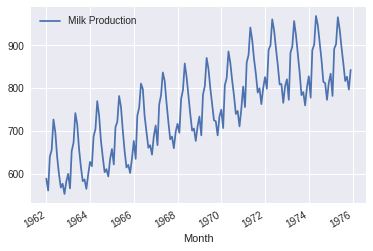

In [0]:
milk.plot()

In [0]:
train_set = milk.head(156)
test_set = milk.tail(12)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

In [0]:
def next_batch(training_data,batch_size,steps):
    rand_start = np.random.randint(0,len(training_data)-steps) 
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [0]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='acc',mode=max,patience=5)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [0]:
X_batch, y_batch = next_batch(train_scaled,10,12)


In [0]:
X_batch.shape

(1, 12, 1)

In [0]:
X_batch=X_batch.reshape(X_batch.shape[1],X_batch.shape[0],1)

In [0]:
y_batch=y_batch.reshape(y_batch.shape[1],y_batch.shape[0],1)

In [0]:
model=Sequential()
model.add(LSTM(12, input_shape=(1,1)))
model.add(Dense(12))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [0]:

history = model.fit(X_batch, y_batch, epochs=50, batch_size=1,verbose=2, shuffle=False)


ValueError: ignored

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 12)                672       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
Total params: 828
Trainable params: 828
Non-trainable params: 0
_________________________________________________________________
